# Ollama model evaluation analyses
- this notebook shows some analyses for the ollama evaluations

In [78]:
# import libraries
import toml
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# load configurations
config = toml.load('model_evaluation.toml')
file = open("/home/tom/Documents/AIP/Bachelorarbeit/creds/psql.pass", "r")
passwd = file.read().strip()
file.close()

In [80]:
# Connect to the database
con = psycopg2.connect( 
    dbname="model_evaluation",
    user="local", 
    password=passwd, 
    host="141.33.165.24" 
)
cur = con.cursor()

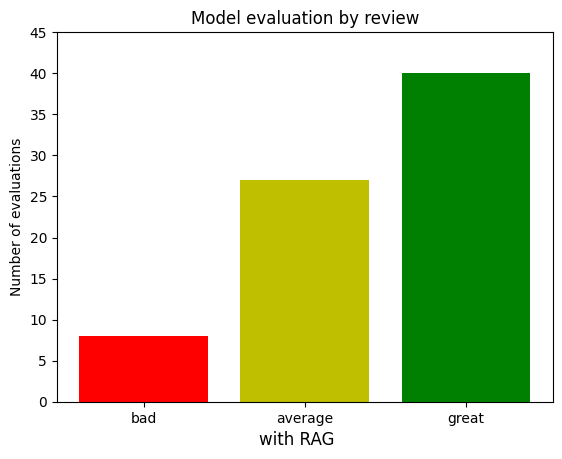

In [81]:
# get the number of evaluations for each class
review_list = []
for i in range(0,3):
    cur.execute(f"SELECT COUNT(*) FROM model_evaluation_rag WHERE review={i};")
    review_list.append(cur.fetchone()[0])
labels = ['bad', 'average', 'great']

# create the plot
plt.bar(labels, review_list, color=['r', 'y', 'g'])
plt.title('Model evaluation by review')
plt.ylabel('Number of evaluations')
plt.figtext(0.5, 0.02, "with RAG", wrap=True, horizontalalignment='center', fontsize=12)
plt.ylim(top=45)
#plt.show()
plt.savefig('model_evaluation_rag.png',format='png', bbox_inches='tight')

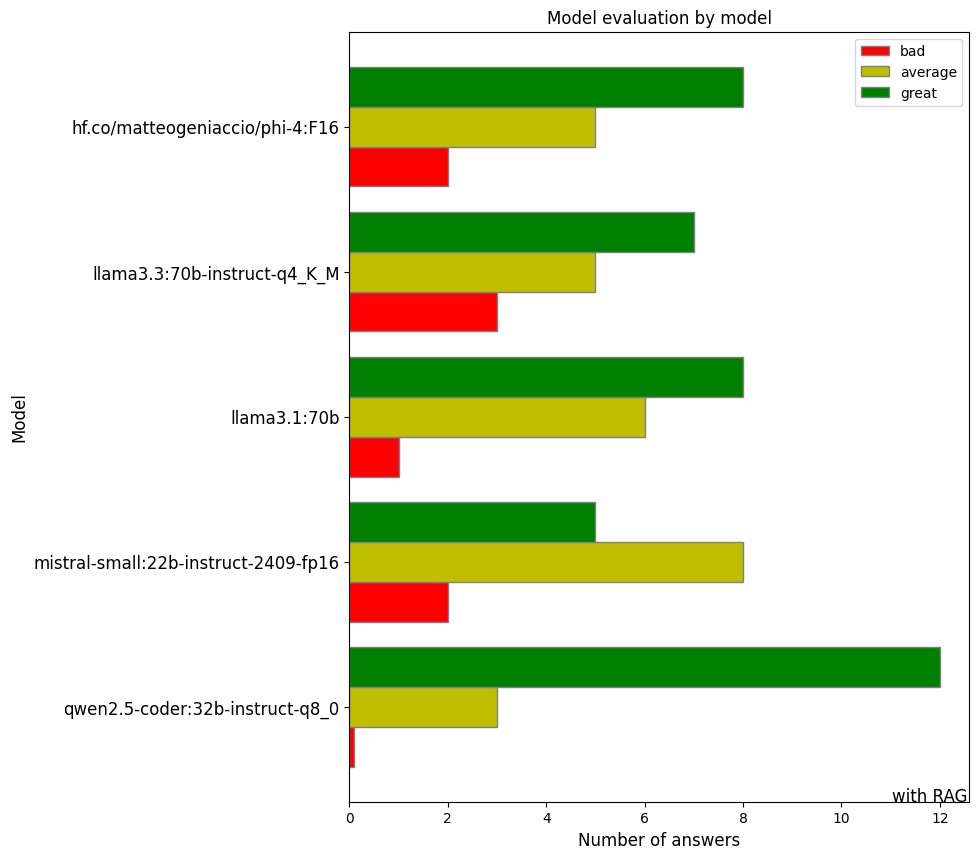

In [82]:
# create empty and standard lists
review_list = [[],[],[]]
colors_list = ['r', 'y', 'g']
labels_list = ['bad', 'average', 'great']

# run sql quries to create lists for the bar chart (bad/average/great per model)
for i in range(0,3):
        tmp_list = []
        for model in config['Models']['list']:
                cur.execute(f"SELECT COUNT(*) FROM model_evaluation_rag WHERE model='{model}' AND review={i};")
                eval = cur.fetchone()[0]
                if(eval == 0):
                        eval = 0.1
                tmp_list.append(eval)
        review_list[i] = tmp_list

# set the width of the bar and create subplots
barWidth = 0.275
fig, ax = plt.subplots(figsize =(8, 10))

# plot the bars by grouping them by review
br = np.arange(len(config["Models"]["list"])) 
for i in range(0, len(review_list)):
        plt.barh(br, review_list[i], color =colors_list[i], edgecolor ='grey', label=labels_list[i], height=barWidth) 
        br = [x + barWidth for x in br]

# add labels and title
plt.xlabel('Number of answers', fontsize = 12) 
plt.ylabel('Model', fontsize = 12) 
plt.yticks([r + barWidth for r in range(len(config["Models"]["list"]))], config["Models"]["list"], fontsize = 12)
plt.title('Model evaluation by model')

ax.annotate('with RAG',xy = (0.875, 0.007),xycoords='axes fraction',ha='left',va="center",fontsize=12)

# add legend + show
plt.legend()
#plt.show()
plt.savefig('model_evaluation_by_model.png',format='png', bbox_inches='tight')

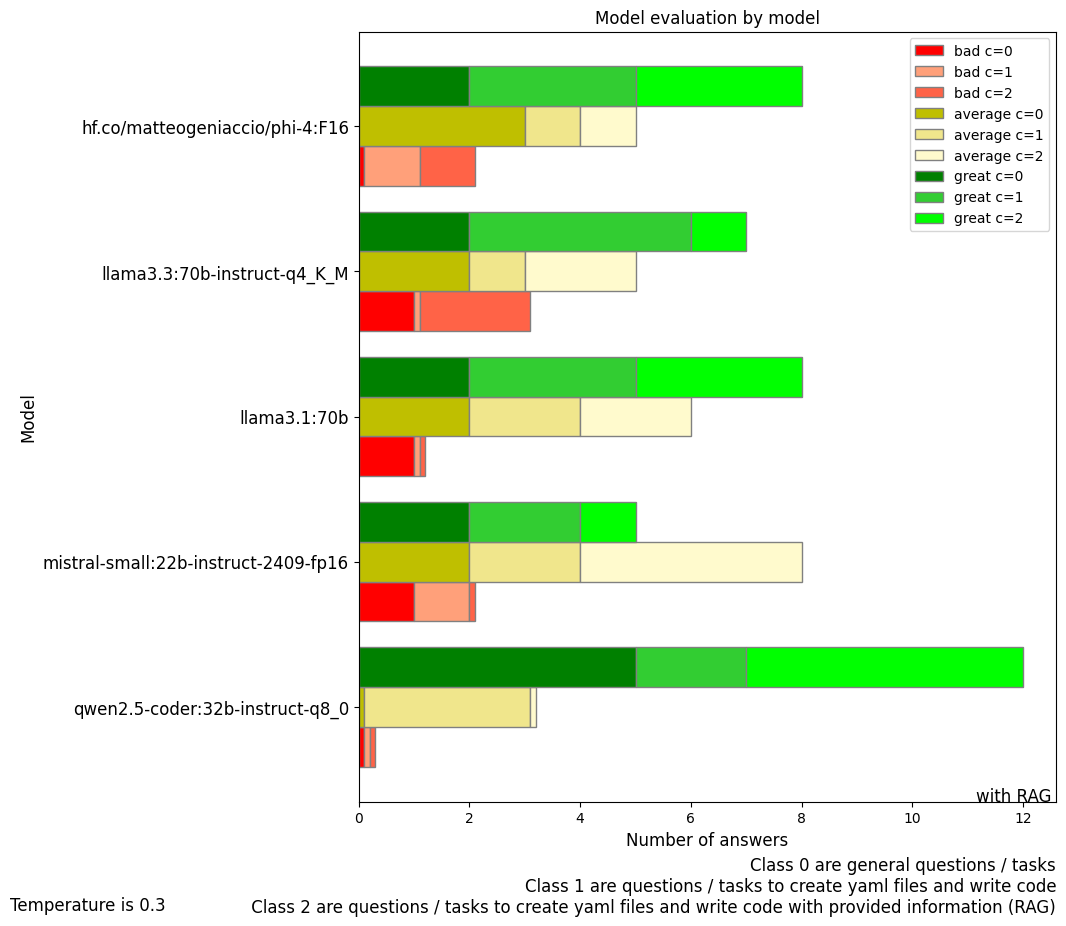

In [83]:
# create empty and standard lists
review_list0 = [[],[],[]]
review_list1 = [[],[],[]]
review_list2 = [[],[],[]]
colors_list = ['r', 'y', 'g']
colors_list2 = ['lightsalmon', 'khaki', 'limegreen']
colors_list3 = ['tomato', 'lemonchiffon', 'lime']
labels_list = ['bad c=0', 'average c=0', 'great c=0']
labels_list2 = ['bad c=1', 'average c=1', 'great c=1']
labels_list3 = ['bad c=2', 'average c=2', 'great c=2']

# run sql quries to create lists for the bar chart (bad/average/great per model)
for i in range(0, 3):
        tmp_list = []
        for model in config['Models']['list']:
                cur.execute(f"SELECT COUNT(*) FROM model_evaluation_rag WHERE model='{model}' AND review={i} AND class='general';")
                eval = cur.fetchone()[0]
                if(eval == 0):
                        eval = 0.1
                tmp_list.append(eval)
        review_list0[i] = tmp_list
        tmp_list = []
        for model in config['Models']['list']:
                cur.execute(f"SELECT COUNT(*) FROM model_evaluation_rag WHERE model='{model}' AND review={i} AND class='programming';")
                eval = cur.fetchone()[0]
                if(eval == 0):
                        eval = 0.1
                tmp_list.append(eval)
        review_list1[i] = tmp_list
        tmp_list = []
        for model in config['Models']['list']:
                cur.execute(f"SELECT COUNT(*) FROM model_evaluation_rag WHERE model='{model}' AND review={i} AND class='programming-rag';")
                eval = cur.fetchone()[0]
                if(eval == 0):
                        eval = 0.1
                tmp_list.append(eval)
        review_list2[i] = tmp_list

# set the width of the bar and create subplots
barWidth = 0.275
fig, ax = plt.subplots(figsize =(9, 10))

# plot the bars by grouping them by review
br = np.arange(len(config["Models"]["list"])) 
for i in range(0, len(review_list0)):
        plt.barh(br, review_list0[i], color =colors_list[i], edgecolor ='grey', label=labels_list[i], height=barWidth)
        plt.barh(br, review_list1[i], color =colors_list2[i], edgecolor ='grey', label=labels_list2[i], height=barWidth, left=review_list0[i])
        plt.barh(br, review_list2[i], color =colors_list3[i], edgecolor ='grey', label=labels_list3[i], height=barWidth, left=[sum(x) for x in zip(review_list0[i], review_list1[i])])
        br = [x + barWidth for x in br]

# add labels and title
plt.xlabel('Number of answers', fontsize = 12) 
plt.ylabel('Model', fontsize = 12) 
plt.yticks([r + barWidth for r in range(len(config["Models"]["list"]))], config["Models"]["list"], fontsize = 12)
plt.title('Model evaluation by model')

ax.annotate('Class 0 are general questions / tasks\nClass 1 are questions / tasks to create yaml files and write code\n Class 2 are questions / tasks to create yaml files and write code with provided information (RAG)',xy = (1.0, -0.11),xycoords='axes fraction',ha='right',va="center",fontsize=12)
ax.annotate('Temperature is 0.3',xy = (-0.5, -0.135),xycoords='axes fraction',ha='left',va="center",fontsize=12)
ax.annotate('with RAG',xy = (0.885, 0.007),xycoords='axes fraction',ha='left',va="center",fontsize=12)


# add legend + show
plt.legend()
#plt.show()
plt.savefig('model_evaluation_by_model_detailed.png',format='png', bbox_inches='tight')

In [84]:
cur.close()